In [1]:
import numpy as np
import scipy.special as special
import scipy.constants as const
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

def fte(n,m,p,rad,length):
    
    zeros = np.zeros((n.size, m))
    
    for ni,i in enumerate(n):
        zeros[i,:]=special.jnp_zeros(ni,m)
   
    f = (const.c / (2*const.pi))*np.sqrt(
            (zeros[:,:,np.newaxis]/rad)**2\
            + (p[np.newaxis,np.newaxis,:]*const.pi/length)**2
        )
    
    return f

def ftm(n,m,p,rad,length):
    
    zeros = np.zeros((n.size, m))
    
    for ni,i in enumerate(n):
        zeros[i,:]=special.jn_zeros(ni,m)
   
    f = (const.c / (2*const.pi))*np.sqrt(
            (zeros[:,:,np.newaxis]/rad)**2\
            + (p[np.newaxis,np.newaxis,:]*const.pi/length)**2
        )
    
    return f

def fte_line(n,m,p,D,L_inv_sq):
    
    zeros = np.zeros((n.size, m))
    
    for ni,i in enumerate(n):
        zeros[i,:]=special.jnp_zeros(ni,m)
        
    f2 = (const.c/(2*const.pi))**2 * (
            (zeros[:,:,np.newaxis,np.newaxis]/D)**2\
            + (p[np.newaxis,np.newaxis,:,np.newaxis]*const.pi/2)**2\
                * (L_inv_sq[np.newaxis,np.newaxis,np.newaxis,:])**1
    ) 
    
    return f2


def ftm_line(n,m,p,D,L_inv_sq):
    
    zeros = np.zeros((n.size, m))
    
    for ni,i in enumerate(n):
        zeros[i,:]=special.jn_zeros(ni,m)
        
    f2 = (const.c/(2*const.pi))**2 * (
            (zeros[:,:,np.newaxis,np.newaxis]/D)**2\
            + (p[np.newaxis,np.newaxis,:,np.newaxis]*const.pi/2)**2\
                * (L_inv_sq[np.newaxis,np.newaxis,np.newaxis,:])**1
    ) 
    
    return f2



In [2]:
special.jnp_zeros(0,50)

array([  3.83170597,   7.01558667,  10.17346814,  13.32369194,
        16.47063005,  19.61585851,  22.76008438,  25.90367209,
        29.04682853,  32.18967991,  35.33230755,  38.47476623,
        41.61709421,  44.759319  ,  47.90146089,  51.04353518,
        54.18555364,  57.32752544,  60.46945785,  63.6113567 ,
        66.75322673,  69.89507184,  73.03689523,  76.17869958,
        79.32048718,  82.46225991,  85.60401944,  88.74576714,
        91.88750425,  95.02923181,  98.17095073, 101.31266182,
       104.45436579, 107.59606326, 110.73775478, 113.87944085,
       117.0211219 , 120.16279833, 123.30447049, 126.4461387 ,
       129.58780325, 132.72946439, 135.87112236, 139.01277739,
       142.15442966, 145.29607935, 148.43772662, 151.57937163,
       154.72101452, 157.8626554 ])

# Mode Dots

In [3]:
p = np.arange(1,101,1)
n = np.arange(0,51,1)
m = 50

radius = 0.5625
ld = 10
length = ld*2*radius

ns,ms,ps = np.meshgrid(n,m,p)

freqs_te = fte(n,m,p,radius,length)

p_tm = np.arange(0,101,1)
freqs_tm = ftm(n,m,p_tm,radius,length)




In [4]:
freqs_te.shape

(51, 50, 100)

In [5]:
freqs_tm.shape

(51, 50, 101)

In [6]:
np.where(freqs_te[:, :, 0]*1e-6 < 500)

(array([0, 1, 1, 2, 3, 4]), array([0, 0, 1, 0, 0, 0]))

In [7]:
sns.set_theme(style='whitegrid',context='paper', font_scale=1.25)
clist = sns.color_palette('bright', n_colors=60)

[ 0  0  0 ... 50 50 50] [ 0  1  2 ... 47 48 49]
[ 0  0  0 ... 50 50 50] [ 0  1  2 ... 47 48 49]


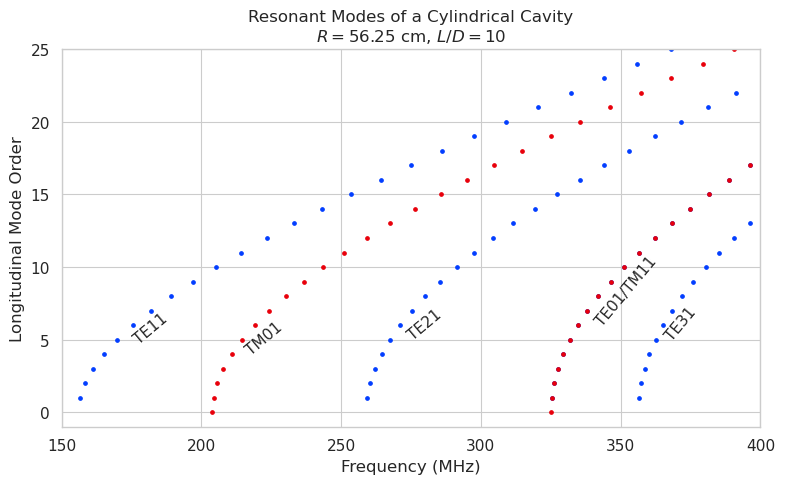

In [33]:

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()

max_f = 100000 #MHz

select_n,select_m = np.where(freqs_te[:,:,0]*1e-6<max_f)
print(select_n,select_m)

for pair in zip(select_n,select_m):
    
    ax.plot(
        freqs_te[pair[0],pair[1],:]*1e-6,
        p,
        marker='.',
        ls='none',
        color=clist[0],
        label=f'TE{pair[0]}{pair[1]+1}',
        #markersize=1
    )

    
select_n,select_m = np.where(freqs_tm[:,:,0]*1e-6<max_f)
print(select_n,select_m)

for pair in zip(select_n,select_m):
    
    ax.plot(
        freqs_tm[pair[0],pair[1],:]*1e-6,
        p_tm,
        marker='.',
        ls='none',
        color=clist[3],
        label=f'TM{pair[0]}{pair[1]+1}',
        #markersize=1
    )

ax.set_xlim(150,400)
ax.set_ylim(-1,25)
#ax.legend(loc=(1.02, 0.2),ncols=2)

#place labels

ax.text(340,6,'TE01/TM11', fontsize=11, rotation=50)
ax.text(365,5,'TE31', fontsize=11, rotation=50)
#ax.text(1325,3,'TM21', fontsize=11, rotation=55)
ax.text(273,5,'TE21', fontsize=11, rotation=40)
ax.text(215,4,'TM01', fontsize=11, rotation=40)
ax.text(175,4.75,'TE11', fontsize=11, rotation=40)
#ylims = ax.get_ylim()
#ax.set_ylim(ylims[0], 50)


ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Longitudinal Mode Order')

ax.set_title('Resonant Modes of a Cylindrical Cavity'+'\n'+r'$R=56.25$ cm, '+r'$L/D=10$')

plt.tight_layout(pad=1.05)
#plt.savefig(Path.home()/'group'/'project'/'plots'/'230614_resmodes_325mhz_ld10',dpi=150)

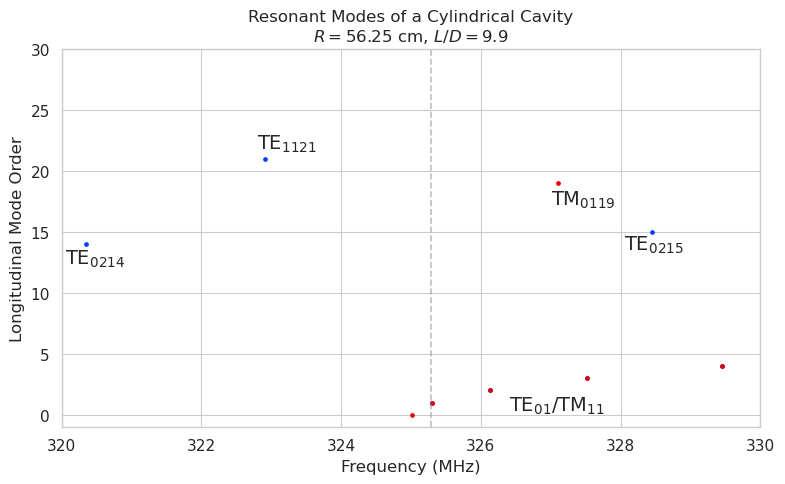

In [381]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()

max_f = 500 #MHz

select_n,select_m = np.where(freqs_te[:,:,0]*1e-6<max_f)

for pair in zip(select_n,select_m):
    
    ax.plot(
        freqs_te[pair[0],pair[1],:]*1e-6,
        p,
        marker='.',
        ls='none',
        color=clist[0],
        label=f'TE{pair[0]}{pair[1]+1}'
    )

    
select_n,select_m = np.where(freqs_tm[:,:,0]*1e-6<max_f)

for pair in zip(select_n,select_m):
    
    ax.plot(
        freqs_tm[pair[0],pair[1],:]*1e-6,
        p_tm,
        marker='.',
        ls='none',
        color=clist[3],
        label=f'TM{pair[0]}{pair[1]+1}'
    )

ax.set_xlim(320,330)
ax.set_ylim(-1,30)
ax.vlines(325.29,-1,30, color='grey', ls='--', alpha=0.5)
#ax.legend(loc=(1.02, 0.2),ncols=2)

#place labels
ax.text(327.,17.2,r'$\mathrm{TM}_{0119}$', fontsize=14, rotation=0)
ax.text(328.05,13.55,r'$\mathrm{TE}_{0215}$', fontsize=14, rotation=0)
ax.text(320.05,12.4,r'$\mathrm{TE}_{0214}$', fontsize=14, rotation=0)
ax.text(322.8,21.8,r'$\mathrm{TE}_{1121}$', fontsize=14, rotation=0)
ax.text(326.4,.3,r'$\mathrm{TE}_{01}$/$\mathrm{TM}_{11}$', fontsize=14, rotation=0)
#ax.text(160,5,'TE11', fontsize=11, rotation=50)
#ax.text(350,5,'TE31', fontsize=11, rotation=50)
#ylims = ax.get_ylim()
#ax.set_ylim(ylims[0], 50)


ax.set_xlabel('Frequency (MHz)')
ax.set_ylabel('Longitudinal Mode Order')

ax.set_title('Resonant Modes of a Cylindrical Cavity'+'\n'+r'$R=56.25$ cm, '+r'$L/D=9.9$')
plt.tight_layout(pad=1.05)
plt.savefig(Path.home()/'group'/'project'/'plots'/'230609_resmodes_325mhz_ld9pt9_zoom',dpi=150)

In [359]:
np.where(np.logical_and(freqs_tm*1e-6<330,freqs_tm*1e-6>320))

(array([0, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0]),
 array([19,  0,  1,  2,  3,  4]))

In [360]:
np.where(np.logical_and(freqs_te*1e-6<330,freqs_te*1e-6>320))

(array([0, 0, 0, 0, 1, 2, 2]),
 array([0, 0, 0, 0, 0, 0, 0]),
 array([ 0,  1,  2,  3, 20, 13, 14]))

In [361]:
freqs_te[np.where(np.logical_and(freqs_te*1e-6<330,freqs_te*1e-6>320))]

array([3.25298832e+08, 3.26133009e+08, 3.27518583e+08, 3.29448597e+08,
       3.22912172e+08, 3.20345481e+08, 3.28442058e+08])

# Frequency Lines

In [523]:
p = np.arange(1,11,1)
p_tm = np.arange(0,11,1)
n = np.arange(0,11,1)
m = 10

radius = 0.1832
diameter = 2*radius

lengths = np.linspace(diameter/2, 20*diameter, 201)

l_inv_sq = (1/lengths)**2

ns,ms,ps = np.meshgrid(n,m,p)

te_freq_lines = fte_line(n,m,p,diameter,l_inv_sq)
tm_freq_lines = ftm_line(n,m,p_tm,diameter,l_inv_sq)

#p_tm = np.arange(0,101,1)
#freqs_tm = ftm(n,m,p_tm,radius,length)



In [496]:
print(te_freq_lines.shape, tm_freq_lines.shape)

(11, 10, 10, 201) (11, 10, 11, 201)


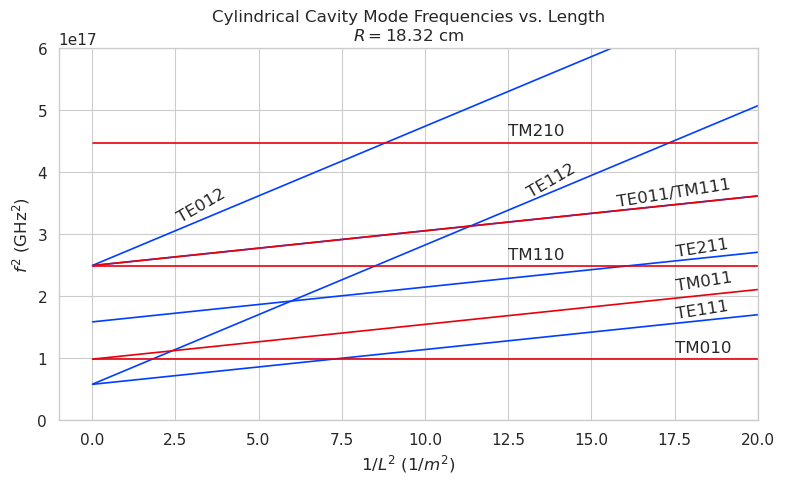

In [579]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot()

te_modes = [
    (0,0,0),#011
    (0,0,1),#012
    (1,0,0),#111
    (1,0,1),#112
    (2,0,0),#211
    #(0,1,0),#021
]
tm_modes = [
    (0,0,0),#010
    (0,0,1),#011
    (1,0,0),#110
    (1,0,1),#111
    (2,0,0),#210
    (0,1,0),#020
]

for mode in te_modes:
    #print([*mode])
    ax.plot(
        l_inv_sq,
        te_freq_lines[mode],
        color=clist[0],
        label=f'{mode}'
    )

for mode in te_modes:
    ax.plot(
        l_inv_sq,
        tm_freq_lines[mode],
        color=clist[3],
        label=f'{mode}'
    )


#ax.plot(l_inv_sq, te_freq_lines[0,1,1], )
#ax.plot(l_inv_sq, te_freq_lines[0,2,1], )

#ax.plot(l_inv_sq, tm_freq_lines[0,0,0], )
#ax.plot(l_inv_sq, tm_freq_lines[1,0,0], )
#ax.plot(l_inv_sq, tm_freq_lines[2,0,0], )
#ax.plot(l_inv_sq, tm_freq_lines[0,1,0], )
#ax.plot(l_inv_sq, tm_freq_lines[0,2,0], )

#ax.legend(loc=(1.02,0.2),ncols=2)

ax.set_ylim(0e17,6e17)
ax.set_xlim(-1,20)

# place labels
te_labels = ['TE011/TM111','TE012','TE111','TE112','TE211',]
te_positions = [(15.75,3.45e17,9),(2.5,3.2e17,30),(17.5,1.65e17,9),(13,3.6e17,30),(17.5,2.65e17,9)]
tm_labels = ['TM010','TM011','TM110','TM210']
tm_positions = [(17.5,1.1e17,0),(17.5,2.1e17,9),(12.5,2.6e17,0),(12.5,4.6e17,0),]

for i in range(len(te_labels)):
    ax.text(te_positions[i][0],te_positions[i][1],te_labels[i],rotation=te_positions[i][2])
    
for i in range(len(tm_labels)):
    ax.text(tm_positions[i][0],tm_positions[i][1],tm_labels[i],rotation=tm_positions[i][2])


ax.set_xlabel(r'$1/L^2$ ($1/m^2$)')
ax.set_ylabel(r'$f^2$ ($\mathrm{GHz}^2$)')
ax.set_title('Cylindrical Cavity Mode Frequencies vs. Length'+'\n'+r'$R=18.32$ cm')
plt.tight_layout(pad=1.05)

plt.savefig(Path.home()/'group'/'project'/'plots'/'230610_mode_lines')